In [1]:
from keras import backend as K
from os import environ
from importlib import reload
import tensorflow as tf

# user defined function to change keras backend
def set_keras_backend(backend):
    if K.backend() != backend:
       environ['KERAS_BACKEND'] = backend
       reload(K)
       assert K.backend() == backend

# call the function with "tensorflow"
set_keras_backend("tensorflow")

C:\Users\achar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas as pd
import os
import numpy as np
import glob
from scipy.misc import imread
import matplotlib.pylab as pylab
import cv2
import keras
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import backend as K
print(keras.backend.backend())

tensorflow


In [3]:
train_csv = pd.read_csv('train.csv')
train_csv.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [4]:
seed = 128
rng = np.random.RandomState(seed)

In [5]:
img_name = rng.choice(train_csv.ID)
filepath = os.path.join('Train', img_name)
print(filepath)
print(img_name)

Train\23790.jpg
23790.jpg


In [6]:
img_array = []
for img_name in train_csv.ID:
    image_path = os.path.join('Train',img_name)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32,32))
    img = np.array(img, dtype = 'float32')
    img_array.append(img)

In [7]:
train_x = np.stack(img_array)

In [8]:
train_x /= 255.0

In [9]:
encoder = LabelEncoder()
encoder.fit(train_csv.Class)
encoded_labels = encoder.transform(train_csv.Class)
train_y = np_utils.to_categorical(encoded_labels)

In [10]:
print(train_y)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
# Initializing the CNN
classifier = Sequential()

In [12]:
classifier.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [13]:
classifier.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix

In [14]:
classifier.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [15]:
classifier.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix

In [16]:
classifier.add(Flatten()) #Flattening the matrix

In [17]:
#Adding layers
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 3, activation = 'softmax'))

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  after removing the cwd from sys.path.


In [18]:
#Compiling model
classifier.compile( optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
epochs = 30
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance

In [20]:
#Training Model
classifier.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.8243 - acc: 0.6250
Epoch 2/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.7010 - acc: 0.6937
Epoch 3/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.6386 - acc: 0.7233: 1s - los
Epoch 4/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.5782 - acc: 0.7523
Epoch 5/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.5197 - acc: 0.7804
Epoch 6/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.4708 - acc: 0.8075
Epoch 7/30
19906/19906 [==============================] - 50s 3ms/step - loss: 0.4094 - acc: 0.8319
Epoch 8/30
19906/19906 [==============================] - 50s 3ms/step - loss: 0.3631 - acc: 0.8539
Epoch 9/30
19906/19906 [==============================] - 50s 3ms/step - loss: 0.3120 - acc: 0.8736
Epoch 10/30
19906/19906 [==============================] - 50s 2ms/step - loss: 0.2714 - a

In [65]:
score = classifier.evaluate(train_x, train_y, batch_size=128)

19906/19906 [==============================] - 18s 880us/step


In [106]:
print("Accuracy: ", (score[1])*100)

Accuracy:  99.12086807997589


In [23]:
# Importing Test Data
test = pd.read_csv('test.csv')
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [25]:
img_name_test = rng.choice(test.ID)
filepath = os.path.join('Test', img_name_test)
print(filepath)
print(img_name_test)

Test\18879.jpg
18879.jpg


In [26]:
img_array = []
for img_name in test.ID:
    image_path = os.path.join('Test',img_name)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32,32))
    img = np.array(img, dtype = 'float32')
    img_array.append(img)

In [28]:
test_x = np.stack(img_array)

In [29]:
test_x /= 255.0

In [30]:
pred = classifier.predict_classes(test_x)

In [31]:
pred

array([0, 2, 0, ..., 0, 0, 2], dtype=int64)

In [32]:
len(pred)

6636

In [33]:
pred = encoder.inverse_transform(pred)

test['Class'] = pred
test.to_csv("output.csv", index=False)

C:\Users\achar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


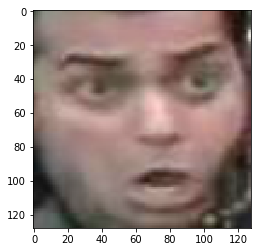

Predicted: MIDDLE


C:\Users\achar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
import random
from matplotlib import pyplot as plt
from scipy.misc import imresize
i = random.choice(test.index)
img_name = test.ID[i]
img_path = os.path.join('Test', img_name)
img = imread(img_path).astype('float32')
#imshow(imresize(img, (128, 128)))
plt.imshow(imresize(img, (128, 128)))
plt.show()
pred = classifier.predict_classes(test_x)
print('Predicted:', encoder.inverse_transform(pred[i]))

### Part B: Activation Function

In [78]:
from keras.layers.advanced_activations import LeakyReLU, PReLU

### Using LeakyRelu

In [79]:
classifier_1 = Sequential()

classifier_1.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_1.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_1.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_1.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_1.add(Flatten()) #Flattening the matrix
classifier_1.add(Dense(output_dim = 128, activation = 'relu'))
classifier_1.add(Dense(output_dim = 128, activation = 'relu'))
classifier_1.add(Dense(output_dim = 128, activation = 'relu'))
classifier_1.add(Dense(output_dim = 3, activation = 'softmax'))
classifier_1.add(LeakyReLU(alpha=.1))
classifier_1.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 10
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_1.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/10
19906/19906 [==============================] - 48s 2ms/step - loss: 0.8273 - acc: 0.6286
Epoch 2/10
19906/19906 [==============================] - 46s 2ms/step - loss: 0.7106 - acc: 0.6859
Epoch 3/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.6444 - acc: 0.7221
Epoch 4/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.5880 - acc: 0.7502
Epoch 5/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.5352 - acc: 0.7814
Epoch 6/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.4853 - acc: 0.7995
Epoch 7/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.4387 - acc: 0.8216
Epoch 8/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.4003 - acc: 0.8372
Epoch 9/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.3551 - acc: 0.8567
Epoch 10/10
19906/19906 [==============================] - 48s 2ms/step - loss: 0.3219 - acc: 0.8737

In [80]:
score_1 = classifier_1.evaluate(train_x, train_y, batch_size=128)

19906/19906 [==============================] - 13s 675us/step


In [107]:
print("Accuracy: ", (score_1[1])*100)

Accuracy:  90.20898221521944


### Using PReLU

In [82]:
classifier_2 = Sequential()

classifier_2.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_2.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_2.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_2.add(Flatten()) #Flattening the matrix
classifier_2.add(Dense(output_dim = 128, activation = 'relu'))
classifier_2.add(Dense(output_dim = 128, activation = 'relu'))
classifier_2.add(Dense(output_dim = 128, activation = 'relu'))
classifier_2.add(Dense(output_dim = 3, activation = 'softmax'))
act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
classifier_2.add(act)
classifier_2.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 10
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_2.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.8287 - acc: 0.6244
Epoch 2/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.7065 - acc: 0.6906
Epoch 3/10
19906/19906 [==============================] - 49s 2ms/step - loss: 0.6406 - acc: 0.7214
Epoch 4/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.5820 - acc: 0.7511
Epoch 5/10
19906/19906 [==============================] - 45s 2ms/step - loss: 0.5336 - acc: 0.7776
Epoch 6/10
19906/19906 [==============================] - 48s 2ms/step - loss: 0.4798 - acc: 0.8033
Epoch 7/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.4335 - acc: 0.8217
Epoch 8/10
19906/19906 [==============================] - 48s 2ms/step - loss: 0.3842 - acc: 0.8464
Epoch 9/10
19906/19906 [==============================] - 48s 2ms/step - loss: 0.3365 - acc: 0.8673
Epoch 10/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.2955 - acc: 0.8845

In [83]:
score_2 = classifier_2.evaluate(train_x, train_y, batch_size=128)

19906/19906 [==============================] - 14s 692us/step


In [108]:
print("Accuracy: ", (score_2[1])*100)

Accuracy:  91.19863358679865


##### How does it effect the accuracy?
**Ans:** As we can see, I have used 2 activation functions named LeakyRelu and PReLU, the accuracy of each is 90.1 and 91.1 respectively. PReLU is better than LeakyRelu.

##### How does it effect how quickly the network plateaus?
**Ans:** With each increase in epoch, loss is decreasing by almost 12% so to achieve a plateaus we need to increase the number of epochs.

### Part C: Cost Function

### Using Squared_Hinge

In [85]:
classifier_3 = Sequential()

classifier_3.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_3.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_3.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_3.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_3.add(Flatten()) #Flattening the matrix
classifier_3.add(Dense(output_dim = 128, activation = 'relu'))
classifier_3.add(Dense(output_dim = 128, activation = 'relu'))
classifier_3.add(Dense(output_dim = 128, activation = 'relu'))
classifier_3.add(Dense(output_dim = 3, activation = 'softmax'))
act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
classifier_3.add(act)
classifier_3.compile(optimizer = 'adam',loss = 'squared_hinge', metrics = ['accuracy'])
epochs = 10
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_3.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/10
19906/19906 [==============================] - 49s 2ms/step - loss: 0.7623 - acc: 0.6193
Epoch 2/10
19906/19906 [==============================] - 48s 2ms/step - loss: 0.7478 - acc: 0.6775
Epoch 3/10
19906/19906 [==============================] - 49s 2ms/step - loss: 0.7421 - acc: 0.7009
Epoch 4/10
19906/19906 [==============================] - 49s 2ms/step - loss: 0.7383 - acc: 0.7186
Epoch 5/10
19906/19906 [==============================] - 50s 2ms/step - loss: 0.7339 - acc: 0.7366
Epoch 6/10
19906/19906 [==============================] - 50s 2ms/step - loss: 0.7297 - acc: 0.7525
Epoch 7/10
19906/19906 [==============================] - 49s 2ms/step - loss: 0.7255 - acc: 0.7761
Epoch 8/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.7217 - acc: 0.7916
Epoch 9/10
19906/19906 [==============================] - 46s 2ms/step - loss: 0.7184 - acc: 0.8041
Epoch 10/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.7148 - acc: 0.8197

In [86]:
score_3 = classifier_3.evaluate(train_x, train_y, batch_size=128)
score_3

19906/19906 [==============================] - 14s 689us/step


[0.7079131645760105, 0.8458756154761846]

In [109]:
print("Accuracy: ", (score_3[1])*100)

Accuracy:  84.58756154761846


### Using Hinge

In [87]:
classifier_4 = Sequential()

classifier_4.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_4.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_4.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_4.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_4.add(Flatten()) #Flattening the matrix
classifier_4.add(Dense(output_dim = 128, activation = 'relu'))
classifier_4.add(Dense(output_dim = 128, activation = 'relu'))
classifier_4.add(Dense(output_dim = 128, activation = 'relu'))
classifier_4.add(Dense(output_dim = 3, activation = 'softmax'))
act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
classifier_4.add(act)
classifier_4.compile(optimizer = 'adam',loss = 'hinge', metrics = ['accuracy'])
epochs = 10
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_4.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.8194 - acc: 0.5428
Epoch 2/10
19906/19906 [==============================] - 48s 2ms/step - loss: 0.8191 - acc: 0.5428
Epoch 3/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.8191 - acc: 0.5428
Epoch 4/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.8191 - acc: 0.5428
Epoch 5/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.8191 - acc: 0.5428
Epoch 6/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.8191 - acc: 0.5428
Epoch 7/10
19906/19906 [==============================] - 49s 2ms/step - loss: 0.8191 - acc: 0.5428
Epoch 8/10
19906/19906 [==============================] - 47s 2ms/step - loss: 0.8191 - acc: 0.5428
Epoch 9/10
19906/19906 [==============================] - 48s 2ms/step - loss: 0.8191 - acc: 0.5428
Epoch 10/10
19906/19906 [==============================] - 49s 2ms/step - loss: 0.8191 - acc: 0.5428

In [88]:
score_4 = classifier_4.evaluate(train_x, train_y, batch_size=128)
score_4

19906/19906 [==============================] - 13s 673us/step


[0.8190829288261231, 0.5427509293320981]

In [110]:
print("Accuracy: ", (score_4[1])*100)

Accuracy:  54.27509293320981


##### How does it effect the accuracy?
**Ans:** As we can see, I have used 2 cost functions named Squared_Hinge and Hinge, the accuracy of each is 84.58 and 54.27 respectively. Squared_Hinge is better than Hinge.

##### How does it effect how quickly the network plateaus?
**Ans:** For Squared_Hinge, the loss is not reducing much so the network plateaus is acheivable if we increase epochs. For Hinge the network plateau is acheived at the second epoch itself since the loss and accuracy remains same after epoch 2.

### Part D: Epochs

### Using Epochs = 20

In [89]:
classifier_5 = Sequential()

classifier_5.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_5.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_5.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_5.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_5.add(Flatten()) #Flattening the matrix
classifier_5.add(Dense(output_dim = 128, activation = 'relu'))
classifier_5.add(Dense(output_dim = 128, activation = 'relu'))
classifier_5.add(Dense(output_dim = 128, activation = 'relu'))
classifier_5.add(Dense(output_dim = 3, activation = 'softmax'))
act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
classifier_5.add(act)
classifier_5.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 20
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_5.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/20
19906/19906 [==============================] - 49s 2ms/step - loss: 0.8193 - acc: 0.6330
Epoch 2/20
19906/19906 [==============================] - 50s 2ms/step - loss: 0.7125 - acc: 0.6903
Epoch 3/20
19906/19906 [==============================] - 49s 2ms/step - loss: 0.6497 - acc: 0.7255
Epoch 4/20
19906/19906 [==============================] - 48s 2ms/step - loss: 0.5983 - acc: 0.7468
Epoch 5/20
19906/19906 [==============================] - 48s 2ms/step - loss: 0.5402 - acc: 0.7743
Epoch 6/20
19906/19906 [==============================] - 48s 2ms/step - loss: 0.4890 - acc: 0.7989
Epoch 7/20
19906/19906 [==============================] - 50s 2ms/step - loss: 0.4319 - acc: 0.8233
Epoch 8/20
19906/19906 [==============================] - 48s 2ms/step - loss: 0.3788 - acc: 0.8460
Epoch 9/20
19906/19906 [==============================] - 48s 2ms/step - loss: 0.3238 - acc: 0.8714
Epoch 10/20
19906/19906 [==============================] - 49s 2ms/step - loss: 0.2781 - acc: 0.8927

In [91]:
score_5 = classifier_5.evaluate(train_x, train_y, batch_size=128)
score_5

19906/19906 [==============================] - 17s 852us/step


[0.061956375702208015, 0.9790013061388526]

In [111]:
print("Accuracy: ", (score_5[1])*100)

Accuracy:  97.90013061388527


### Using Epoch = 50

In [90]:
classifier_6 = Sequential()

classifier_6.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_6.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_6.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_6.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_6.add(Flatten()) #Flattening the matrix
classifier_6.add(Dense(output_dim = 128, activation = 'relu'))
classifier_6.add(Dense(output_dim = 128, activation = 'relu'))
classifier_6.add(Dense(output_dim = 128, activation = 'relu'))
classifier_6.add(Dense(output_dim = 3, activation = 'softmax'))
act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
classifier_6.add(act)
classifier_6.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 50
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_6.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/50
19906/19906 [==============================] - 47s 2ms/step - loss: 0.8185 - acc: 0.6294
Epoch 2/50
19906/19906 [==============================] - 53s 3ms/step - loss: 0.7212 - acc: 0.6866
Epoch 3/50
19906/19906 [==============================] - 61s 3ms/step - loss: 0.6643 - acc: 0.7129
Epoch 4/50
19906/19906 [==============================] - 60s 3ms/step - loss: 0.6053 - acc: 0.7418
Epoch 5/50
19906/19906 [==============================] - 61s 3ms/step - loss: 0.5522 - acc: 0.7715
Epoch 6/50
19906/19906 [==============================] - 61s 3ms/step - loss: 0.4980 - acc: 0.7920
Epoch 7/50
19906/19906 [==============================] - 61s 3ms/step - loss: 0.4480 - acc: 0.8164
Epoch 8/50
19906/19906 [==============================] - 61s 3ms/step - loss: 0.3963 - acc: 0.8394
Epoch 9/50
19906/19906 [==============================] - 61s 3ms/step - loss: 0.3526 - acc: 0.8579
Epoch 10/50
19906/19906 [==============================] - 61s 3ms/step - loss: 0.3082 - acc: 0.8789

In [92]:
score_6 = classifier_6.evaluate(train_x, train_y, batch_size=128)
score_6

19906/19906 [==============================] - 17s 873us/step


[0.016029941555547524, 0.9949763890284337]

In [112]:
print("Accuracy: ", (score_6[1])*100)

Accuracy:  99.49763890284336


##### How does it effect the accuracy?
**Ans:** As we can see, I have used 2 epochs 20 and 50, the accuracy of each is 97% and 99% respectively. It is obvious that as the epochs increases accuracy increases.

##### How does it effect how quickly the network plateaus?
**Ans:** Network Plateau is almost acheived at epoch 40

### Part E: Gradient Estimation

### Using RMSProp

In [93]:
classifier_7 = Sequential()

classifier_7.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_7.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_7.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_7.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_7.add(Flatten()) #Flattening the matrix
classifier_7.add(Dense(output_dim = 128, activation = 'relu'))
classifier_7.add(Dense(output_dim = 128, activation = 'relu'))
classifier_7.add(Dense(output_dim = 128, activation = 'relu'))
classifier_7.add(Dense(output_dim = 3, activation = 'softmax'))
act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
classifier_7.add(act)
classifier_7.compile(optimizer = 'RMSProp',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 30
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_7.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

score_7 = classifier_4.evaluate(train_x, train_y, batch_size=128)
score_7

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/30
19906/19906 [==============================] - 61s 3ms/step - loss: 0.8223 - acc: 0.6312
Epoch 2/30
19906/19906 [==============================] - 59s 3ms/step - loss: 0.7089 - acc: 0.6951
Epoch 3/30
19906/19906 [==============================] - 60s 3ms/step - loss: 0.6513 - acc: 0.7283
Epoch 4/30
19906/19906 [==============================] - 59s 3ms/step - loss: 0.6062 - acc: 0.7489
Epoch 5/30
19906/19906 [==============================] - 59s 3ms/step - loss: 0.5729 - acc: 0.7692
Epoch 6/30
19906/19906 [==============================] - 60s 3ms/step - loss: 0.5374 - acc: 0.7860
Epoch 7/30
19906/19906 [==============================] - 59s 3ms/step - loss: 0.5041 - acc: 0.8005
Epoch 8/30
19906/19906 [==============================] - 62s 3ms/step - loss: 0.4922 - acc: 0.8073
Epoch 9/30
19906/19906 [==============================] - 61s 3ms/step - loss: 0.4715 - acc: 0.8221
Epoch 10/30
19906/19906 [==============================] - 61s 3ms/step - loss: 0.4705 - acc: 0.8274

[0.8190829288261231, 0.5427509293320981]

In [94]:
score_7 = classifier_7.evaluate(train_x, train_y, batch_size=128)
score_7

19906/19906 [==============================] - 19s 930us/step


[0.40898967486619353, 0.863357781603338]

In [113]:
print("Accuracy: ", (score_7[1])*100)

Accuracy:  86.3357781603338


### Using Stochastic Gradient Descent(SGD)

In [95]:
classifier_8 = Sequential()

classifier_8.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_8.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_8.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_8.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_8.add(Flatten()) #Flattening the matrix
classifier_8.add(Dense(output_dim = 128, activation = 'relu'))
classifier_8.add(Dense(output_dim = 128, activation = 'relu'))
classifier_8.add(Dense(output_dim = 128, activation = 'relu'))
classifier_8.add(Dense(output_dim = 3, activation = 'softmax'))
# act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
# classifier_8.add(act)
classifier_8.compile(optimizer = 'SGD',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 30
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_8.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

score_8 = classifier_8.evaluate(train_x, train_y, batch_size=128)
score_8

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/30
19906/19906 [==============================] - 58s 3ms/step - loss: 0.9434 - acc: 0.5437
Epoch 2/30
19906/19906 [==============================] - 46s 2ms/step - loss: 0.9040 - acc: 0.5628
Epoch 3/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.8472 - acc: 0.6078
Epoch 4/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.7910 - acc: 0.6440
Epoch 5/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.7601 - acc: 0.6615
Epoch 6/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.7392 - acc: 0.6762
Epoch 7/30
19906/19906 [==============================] - 45s 2ms/step - loss: 0.7179 - acc: 0.6838
Epoch 8/30
19906/19906 [==============================] - 46s 2ms/step - loss: 0.6976 - acc: 0.6954
Epoch 9/30
19906/19906 [==============================] - 47s 2ms/step - loss: 0.6768 - acc: 0.7061
Epoch 10/30
19906/19906 [==============================] - 45s 2ms/step - loss: 0.6597 - acc: 0.7134

[0.1616879688020233, 0.9403697377076212]

In [114]:
print("Accuracy: ", (score_8[1])*100)

Accuracy:  94.03697377076212


##### How does it effect the accuracy?
**Ans:** As we can see, I have used 2 gradient estimators RMSProp and SGD, the accuracy of each is 86% and 94% respectively. SGD is providing better accuracy.

##### How does it effect how quickly the network plateaus?
**Ans:** Network Plateau is almost acheived at epoch 30 in RMSProp while in SGD it needs more epochs

### Part F: Network Architechture

### No of Layers

In [104]:
classifier_9 = Sequential()

classifier_9.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_9.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_9.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_9.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_9.add(Flatten()) #Flattening the matrix
classifier_9.add(Dense(output_dim = 128, activation = 'relu'))
classifier_9.add(Dense(output_dim = 128, activation = 'relu'))
classifier_9.add(Dense(output_dim = 128, activation = 'relu'))
classifier_9.add(Dense(output_dim = 128, activation = 'relu'))
classifier_9.add(Dense(output_dim = 128, activation = 'relu'))
classifier_9.add(Dense(output_dim = 3, activation = 'softmax'))
act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
classifier_9.add(act)
classifier_9.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 30
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_9.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

score_9 = classifier_9.evaluate(train_x, train_y, batch_size=128)
score_9

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`

Epoch 1/30
19906/19906 [==============================] - 51s 3ms/step - loss: 0.8446 - acc: 0.6204
Epoch 2/30
19906/19906 [==============================] - 49s 2ms/step - loss: 0.7227 - acc: 0.6853
Epoch 3/30
19906/19906 [==============================] - 49s 2ms/step - loss: 0.6587 - acc: 0.7187: 1s - loss: 0.
Epoch 4/30
19906/19906 [==============================] - 50s 3ms/step - loss: 0.5942 - acc: 0.7524
Epoch 5/30
19906/19906 [==============================] - 50s 3ms/step - loss: 0.5424 - acc: 0.7768
Epoch 6/30
19906/19906 [==============================] - 50s 3ms/step - loss: 0.4869 - acc: 0.7997
Epoch 7/30
19906/19906 [==============================] - 49s 2ms/step - loss: 0.4336 - acc: 0.8253
Epoch 8/30
19906/19906 [==============================] - 48s 2ms/step - loss: 0.3823 - acc: 0.8469
Epoch 9/30
19906/19906 [==============================] - 53s 3ms/step - loss: 0.3349 - acc: 0.8694
Epoch 10/30
19906/19906 [==============================] - 50s 2ms/step - loss: 0.300

[0.048406088718556645, 0.9824675977571423]

In [115]:
print("Accuracy: ", (score_9[1])*100)

Accuracy:  98.24675977571424


### Size of the Layer

In [103]:
classifier_10 = Sequential()

classifier_10.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_10.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_10.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_10.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_10.add(Flatten()) #Flattening the matrix
classifier_10.add(Dense(output_dim = 64, activation = 'relu'))
classifier_10.add(Dense(output_dim = 64, activation = 'relu'))
classifier_10.add(Dense(output_dim = 64, activation = 'relu'))
classifier_10.add(Dense(output_dim = 3, activation = 'softmax'))
# act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
# classifier_10.add(act)
classifier_10.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 30
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_10.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

score_10 = classifier_10.evaluate(train_x, train_y, batch_size=128)
score_10

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  

Epoch 1/30
19906/19906 [==============================] - 51s 3ms/step - loss: 0.8303 - acc: 0.6226
Epoch 2/30
19906/19906 [==============================] - 40s 2ms/step - loss: 0.7133 - acc: 0.6875
Epoch 3/30
19906/19906 [==============================] - 40s 2ms/step - loss: 0.6559 - acc: 0.7173
Epoch 4/30
19906/19906 [==============================] - 40s 2ms/step - loss: 0.6054 - acc: 0.7425
Epoch 5/30
19906/19906 [==============================] - 40s 2ms/step - loss: 0.5589 - acc: 0.7675
Epoch 6/30
19906/19906 [==============================] - 41s 2ms/step - loss: 0.5164 - acc: 0.7877
Epoch 7/30
19906/19906 [==============================] - 42s 2ms/step - loss: 0.4735 - acc: 0.8072
Epoch 8/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.4343 - acc: 0.8264
Epoch 9/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.3958 - acc: 0.8431
Epoch 10/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.3653 - acc: 0.8531

[0.06851508052555338, 0.9758364312746747]

In [116]:
print("Accuracy: ", (score_10[1])*100)

Accuracy:  97.58364312746747


##### How does it effect the accuracy?
**Ans:** As we can see, I have change number of layers and size of the layer, the accuracy of each is 98% and 97% respectively. We can see that as we add a layer, the accuracy increases.

##### How does it effect how quickly the network plateaus?
**Ans:** Network Plateau is not acheived till 30 epochs in both the case.

### Part G: Network initialization

### Using Gaussian

In [102]:
classifier_11 = Sequential()

classifier_11.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_11.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_11.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_11.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_11.add(Flatten()) #Flattening the matrix
classifier_11.add(Dense(output_dim = 64, kernel_initializer="glorot_normal", activation = 'relu'))
classifier_11.add(Dense(output_dim = 64, kernel_initializer="glorot_normal", activation = 'relu'))
classifier_11.add(Dense(output_dim = 64, kernel_initializer="glorot_normal", activation = 'relu'))
classifier_11.add(Dense(output_dim = 3, kernel_initializer="glorot_normal", activation = 'softmax'))
# act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
# classifier_11.add(act)
classifier_11.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 30
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_11.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

score_11 = classifier_11.evaluate(train_x, train_y, batch_size=128)
score_11

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_normal", activation="relu", units=64)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_normal", activation="relu", units=64)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your 

Epoch 1/30
19906/19906 [==============================] - 46s 2ms/step - loss: 0.8287 - acc: 0.6244
Epoch 2/30
19906/19906 [==============================] - 47s 2ms/step - loss: 0.7055 - acc: 0.6931
Epoch 3/30
19906/19906 [==============================] - 48s 2ms/step - loss: 0.6489 - acc: 0.7232
Epoch 4/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.6020 - acc: 0.7417
Epoch 5/30
19906/19906 [==============================] - 46s 2ms/step - loss: 0.5655 - acc: 0.7611
Epoch 6/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.5232 - acc: 0.7791
Epoch 7/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.4815 - acc: 0.8034
Epoch 8/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.4515 - acc: 0.8159
Epoch 9/30
19906/19906 [==============================] - 45s 2ms/step - loss: 0.4125 - acc: 0.8301
Epoch 10/30
19906/19906 [==============================] - 46s 2ms/step - loss: 0.3830 - acc: 0.8443

[0.1585465131270805, 0.9474530293332336]

In [117]:
print("Accuracy: ", (score_11[1])*100)

Accuracy:  97.01597508229072


### Using Xavier Uniform

In [105]:
classifier_11 = Sequential()

classifier_11.add(Convolution2D(64,3,3,input_shape = (32,32,3), activation = 'relu'))
classifier_11.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_11.add(Convolution2D(64,3,3,input_shape = (15,15,3), activation = 'relu')) #Adding the convolution layer
classifier_11.add(MaxPooling2D(pool_size = (2,2))) #Applying Max Pooling to the convlved matrix
classifier_11.add(Flatten()) #Flattening the matrix
classifier_11.add(Dense(output_dim = 64, kernel_initializer="glorot_uniform", activation = 'relu'))
classifier_11.add(Dense(output_dim = 64, kernel_initializer="glorot_uniform", activation = 'relu'))
classifier_11.add(Dense(output_dim = 64, kernel_initializer="glorot_uniform", activation = 'relu'))
classifier_11.add(Dense(output_dim = 3, kernel_initializer="glorot_uniform", activation = 'softmax'))
# act = keras.layers.advanced_activations.PReLU(init='one', weights=None)
# classifier_11.add(act)
classifier_11.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 30
batch_size = 20 #As the size of images is small so we can afford small batch size for better performance
classifier_11.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

score_11 = classifier_11.evaluate(train_x, train_y, batch_size=128)
score_11

C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(15, 15, 3..., activation="relu")`
  """
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="relu", units=64)`
  
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="relu", units=64)`
  if __name__ == '__main__':
C:\Users\achar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update you

Epoch 1/30
19906/19906 [==============================] - 45s 2ms/step - loss: 0.8261 - acc: 0.6221
Epoch 2/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.7137 - acc: 0.6867
Epoch 3/30
19906/19906 [==============================] - 46s 2ms/step - loss: 0.6544 - acc: 0.7157
Epoch 4/30
19906/19906 [==============================] - 46s 2ms/step - loss: 0.6072 - acc: 0.7361
Epoch 5/30
19906/19906 [==============================] - 43s 2ms/step - loss: 0.5578 - acc: 0.7626
Epoch 6/30
19906/19906 [==============================] - 45s 2ms/step - loss: 0.5099 - acc: 0.7871
Epoch 7/30
19906/19906 [==============================] - 45s 2ms/step - loss: 0.4653 - acc: 0.8046
Epoch 8/30
19906/19906 [==============================] - 45s 2ms/step - loss: 0.4302 - acc: 0.8249
Epoch 9/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.3959 - acc: 0.8387
Epoch 10/30
19906/19906 [==============================] - 44s 2ms/step - loss: 0.3602 - acc: 0.8532

[0.08590449643269216, 0.9701597508229072]

In [120]:
print("Accuracy: ", (score_11[1])*100)

Accuracy:  97.01597508229072


##### How does it effect the accuracy?
**Ans:** As we can see, I have used 2 network initializers Gaussian and Xavier Uniform, the accuracy of each is 94% and 97% respectively. We can see that as we add a layer, the accuracy increases.

##### How does it effect how quickly the network plateaus?
**Ans:** Network Plateau is not acheived till 30 epochs in both the case.

### Refernces:

- https://www.kaggle.com/ashishpatel26/indian-movie-face-database-imfdm-keras
- https://github.com/smartyining/IMFDB
- https://machinelearningmastery.com/improve-deep-learning-performance/
- https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/